In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [7]:
y_knn_pred = knn_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_neighbors': [1,3,4,6,8,10,20], 'weights': ['uniform', 'distance']}
 ]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.970 total time=  11.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.971 total time=  10.5s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=  11.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=  11.1s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.968 total time=  11.0s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.970 total time=  10.9s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.971 total time=  10.7s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  10.9s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  10.4s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.968 total time=  10.5s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  10.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=4, weights='distance'),
             param_grid=[{'n_neighbors': [1, 3, 4, 6, 8, 10, 20],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [13]:
grid_search.best_score_

np.float64(0.9716166666666666)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5884,    3,    4,    0,    1,    4,   17,    1,    5,    4],
       [   1, 6706,   10,    1,    3,    1,    3,   10,    3,    4],
       [  41,   47, 5716,   18,   10,    5,    9,   83,   18,   11],
       [   7,   12,   29, 5891,    1,   72,    6,   38,   49,   26],
       [   3,   50,    1,    1, 5636,    0,   15,   16,    3,  117],
       [  15,    8,    4,   61,    6, 5218,   56,    6,   17,   30],
       [  21,   11,    1,    0,    7,   22, 5853,    0,    3,    0],
       [   3,   58,   12,    2,   11,    2,    0, 6109,    4,   64],
       [  17,   68,    8,   68,   29,   81,   26,   13, 5477,   64],
       [  13,    9,    5,   33,   51,   13,    5,   76,   13, 5731]])

In [18]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


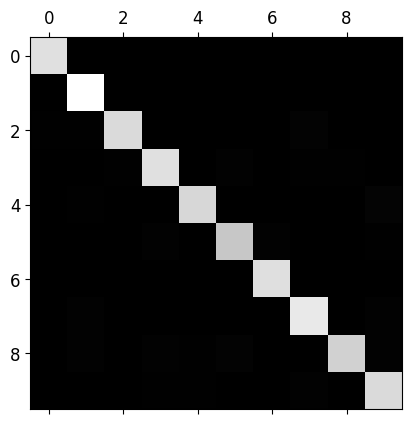

In [19]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


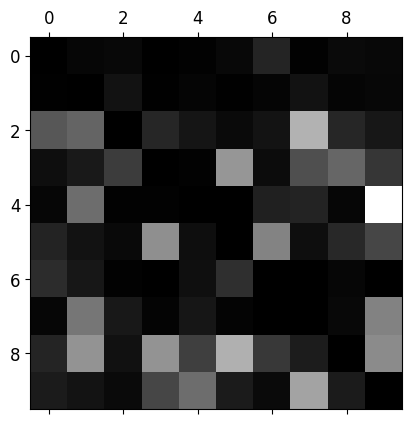

In [20]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


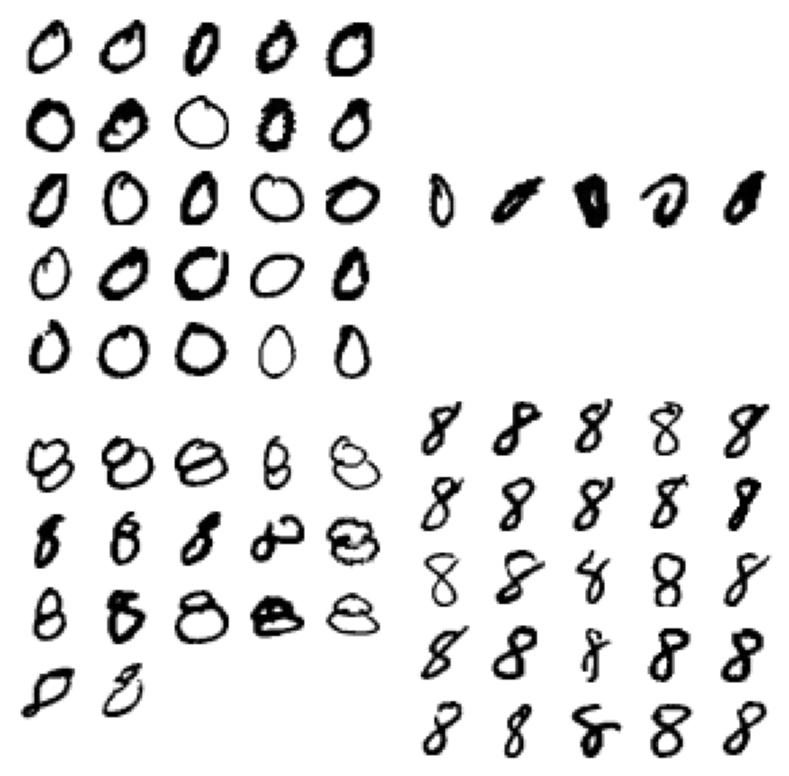

In [31]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
cl_a, cl_b = 1, 7
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

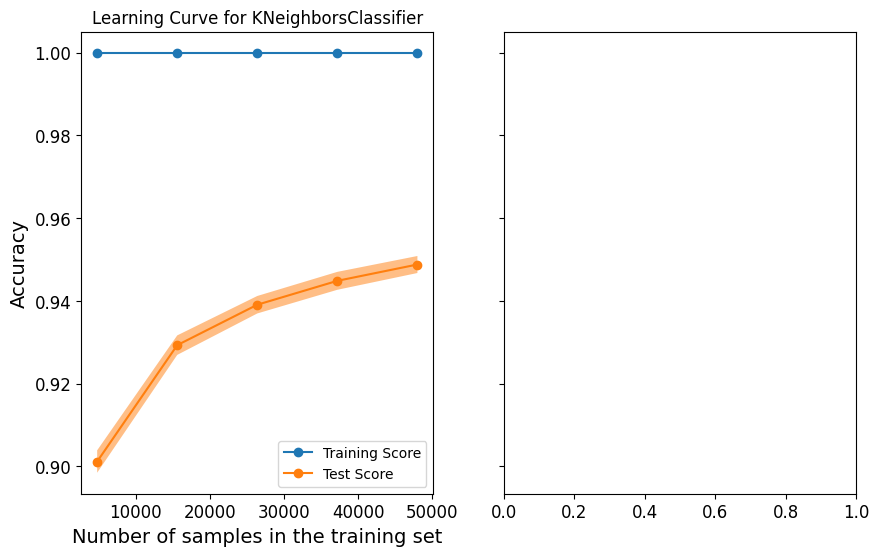

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([knn_clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

np.float64(0.9677666666666667)

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
sgd_score.mean()

np.float64(0.8970333333333333)

In [63]:
y_sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
accuracy_score(y_train, y_sgd_pred)

0.8970333333333333

In [68]:
y_forest_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_forest_pred)
conf_mx

array([[5823,    4,   17,    7,    0,   19,   41,    4,    5,    3],
       [   2, 6664,   19,   12,    7,    3,   14,   11,    6,    4],
       [  65,   51, 5543,   89,   30,    9,   49,   52,   43,   27],
       [  13,   20,   54, 5768,    5,   96,    7,   69,   69,   30],
       [   4,   62,   46,    7, 5432,   16,   25,   37,   14,  199],
       [  23,   11,   11,  149,   10, 5011,   94,   14,   48,   50],
       [  57,   13,   15,    5,   11,   51, 5759,    1,    6,    0],
       [  10,   51,   27,   15,   61,    2,    0, 5871,    4,  224],
       [  47,   75,   37,  105,   37,  179,   37,   20, 5240,   74],
       [  18,    8,   19,   46,  111,   12,    1,  204,   15, 5515]])

In [65]:
conf_mx = confusion_matrix(y_train, y_sgd_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [58]:
y_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)

In [60]:
conf_mx = confusion_matrix(y_train, y_knn_pred)
conf_mx

array([[5825,    3,   16,    6,    0,   18,   41,    4,    4,    6],
       [   1, 6664,   21,   13,    9,    3,   11,   12,    5,    3],
       [  57,   50, 5562,   89,   21,    9,   47,   57,   42,   24],
       [  13,   17,   54, 5772,    5,   95,    6,   70,   66,   33],
       [   3,   59,   44,    4, 5441,   15,   21,   33,   15,  207],
       [  20,    9,   10,  155,   12, 5025,   82,   15,   52,   41],
       [  54,   11,   17,    6,   11,   42, 5768,    1,    8,    0],
       [  10,   53,   26,   17,   48,    3,    0, 5901,    4,  203],
       [  45,   74,   39,  101,   39,  156,   37,   19, 5274,   67],
       [  13,    7,   16,   47,  111,   13,    1,  164,   18, 5559]])

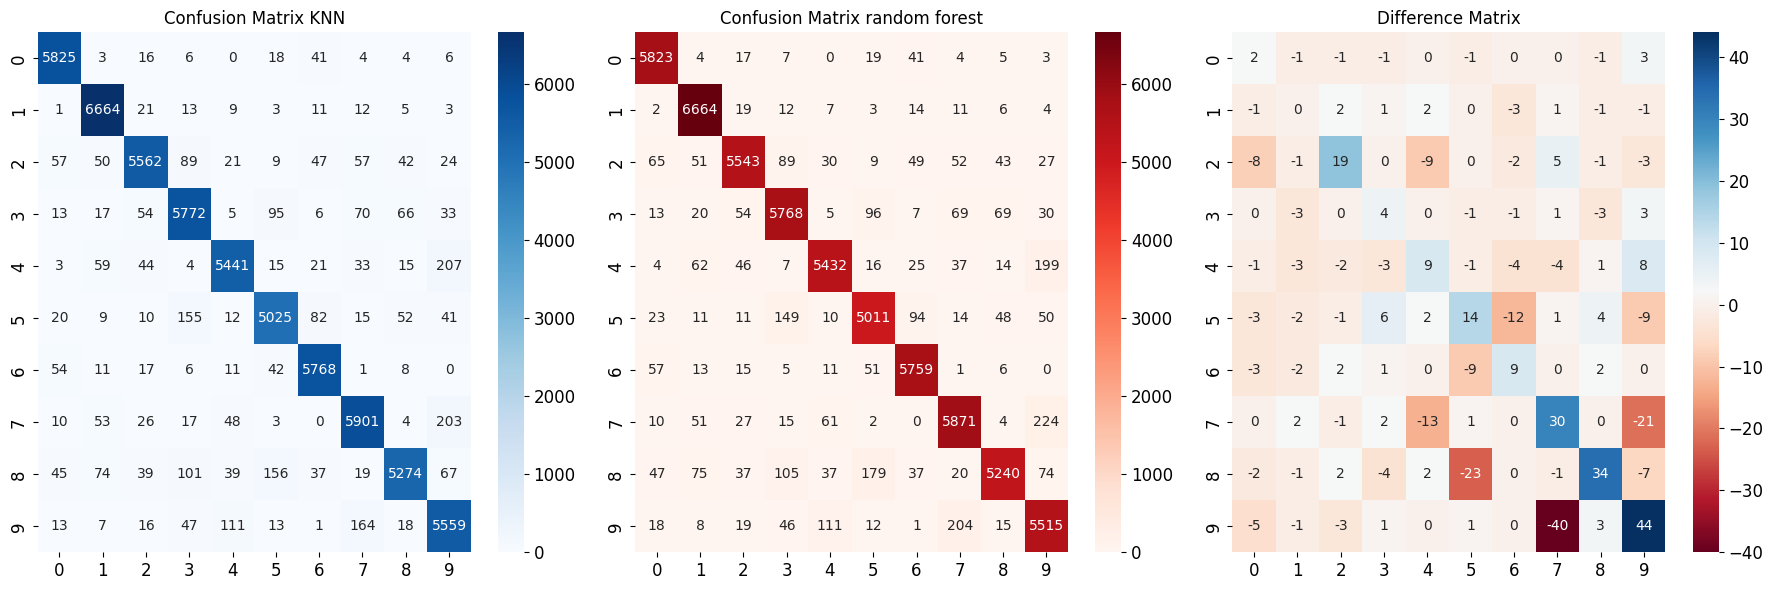

In [78]:
import seaborn as sns
difference_matrix = confusion_matrix(y_train, y_knn_pred) - confusion_matrix(y_train, y_forest_pred)

# Plot the matrices side by side and the difference matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot first confusion matrix
sns.heatmap(confusion_matrix(y_train, y_knn_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix KNN')

# Plot second confusion matrix
sns.heatmap(confusion_matrix(y_train, y_forest_pred), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Confusion Matrix random forest')

# Plot difference matrix
sns.heatmap(difference_matrix, annot=True, fmt='d', cmap='RdBu', ax=axes[2])
axes[2].set_title('Difference Matrix')

plt.tight_layout()
plt.show()